In [28]:
import pandas as pd
import numpy as np
import plotly.express as px

from dash import dcc
from app_studio import Rv
import plotly.express as px

In [29]:
u1040 = 'https://data.pmel.noaa.gov/generic/erddap/tabledap/sd1040_hurricane_2023.csv?time,latitude,longitude,BARO_PRES_MEAN,WIND_SPEED_MEAN,TEMP_SBE37_MEAN,WAVE_SIGNIFICANT_HEIGHT&time>=2023-10-21&time<=2023-10-25'
u1041 = 'https://data.pmel.noaa.gov/generic/erddap/tabledap/sd1041_hurricane_2023.csv?time,latitude,longitude,BARO_PRES_MEAN,WIND_SPEED_MEAN,TEMP_SBE37_MEAN,WAVE_SIGNIFICANT_HEIGHT&time>=2023-10-21&time<=2023-10-25'
u1068 = 'https://data.pmel.noaa.gov/generic/erddap/tabledap/sd1068_hurricane_2023.csv?time,latitude,longitude,BARO_PRES_MEAN,WIND_SPEED_MEAN,TEMP_SBE37_MEAN,WAVE_SIGNIFICANT_HEIGHT&time>=2023-10-21&time<=2023-10-25'

In [30]:
d1040 = pd.read_csv(u1040, skiprows=[1])
d1040['drone'] = 'sd1040'
d1041 = pd.read_csv(u1041, skiprows=[1])
d1041['drone'] = 'sd1041'
d1068 = pd.read_csv(u1068, skiprows=[1])
d1068['drone'] = 'sd1068'
df = pd.concat([d1040, d1041, d1068])
df

,time,latitude,longitude,BARO_PRES_MEAN,WIND_SPEED_MEAN,TEMP_SBE37_MEAN,WAVE_SIGNIFICANT_HEIGHT,drone
0,2023-10-21T00:00:00Z,18.680941,-63.809869,1011.49,10.13,29.8084,2.555,sd1040
1,2023-10-21T00:01:00Z,18.681280,-63.809542,1011.54,8.52,29.8138,2.598,sd1040
2,2023-10-21T00:02:00Z,18.681589,-63.809306,1011.52,10.40,29.8124,2.589,sd1040
3,2023-10-21T00:03:00Z,18.681902,-63.809050,1011.55,9.84,29.8165,2.621,sd1040
4,2023-10-21T00:04:00Z,18.682272,-63.808698,1011.54,9.25,29.8118,2.660,sd1040
...,...,...,...,...,...,...,...,...
5756,2023-10-24T23:56:00Z,22.109997,-63.377990,1007.47,8.47,28.7635,3.147,sd1068
5757,2023-10-24T23:57:00Z,22.110389,-63.377574,1007.48,7.78,28.7614,3.127,sd1068
5758,2023-10-24T23:58:00Z,22.110859,-63.377075,1007.46,8.44,28.7572,3.087,sd1068
5759,2023-10-24T23:59:00Z,22.111344,-63.376538,1007.48,7.95,28.7610,3.025,sd1068


In [31]:
variable_dropdown = dcc.Dropdown(
    options=df.columns,
    value='BARO_PRES_MEAN',
    multi=False
)

In [32]:
plot_value = Rv(variable_dropdown, 'value')
plot_value

'BARO_PRES_MEAN'

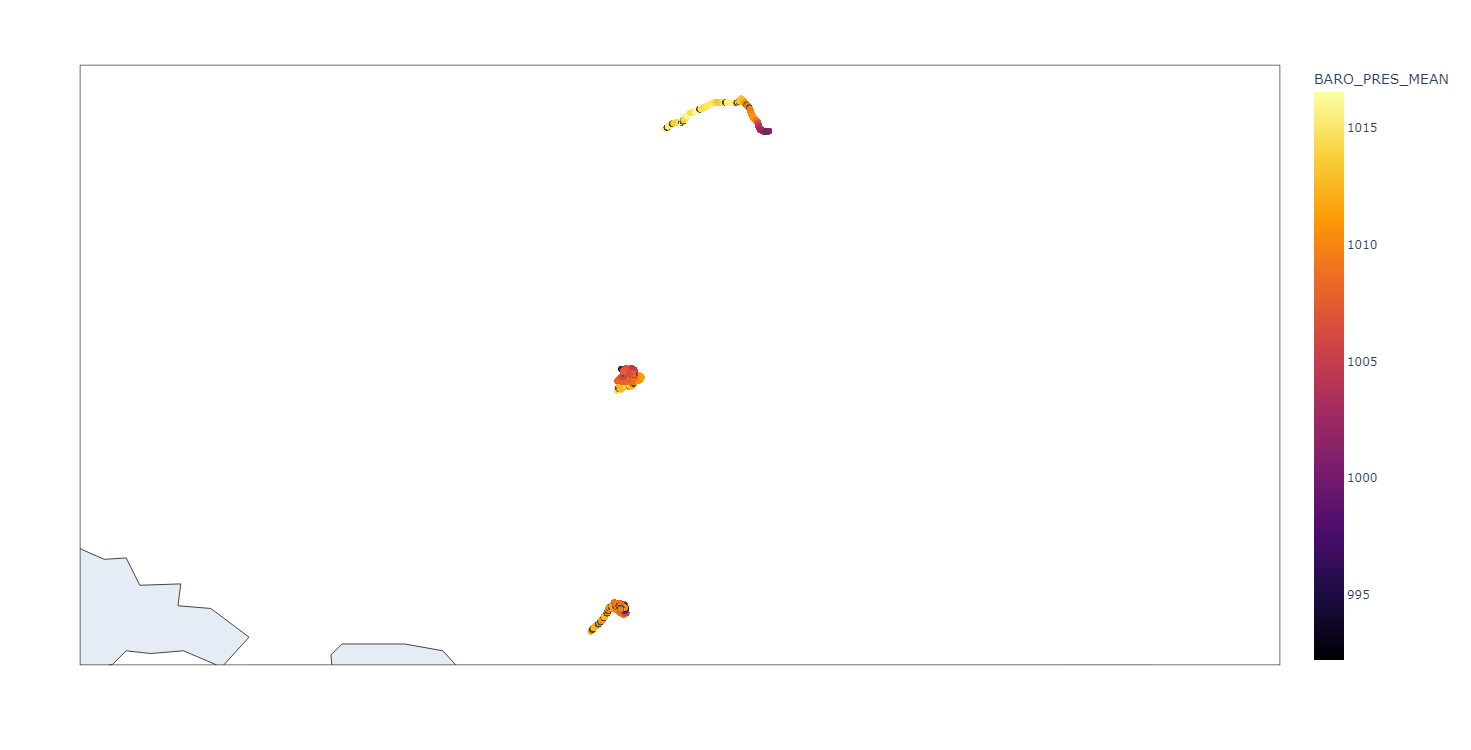

In [38]:
map = px.scatter_geo(df, lat='latitude', lon='longitude', color=plot_value, fitbounds='locations', height=750,  color_continuous_scale=px.colors.sequential.Inferno)
map

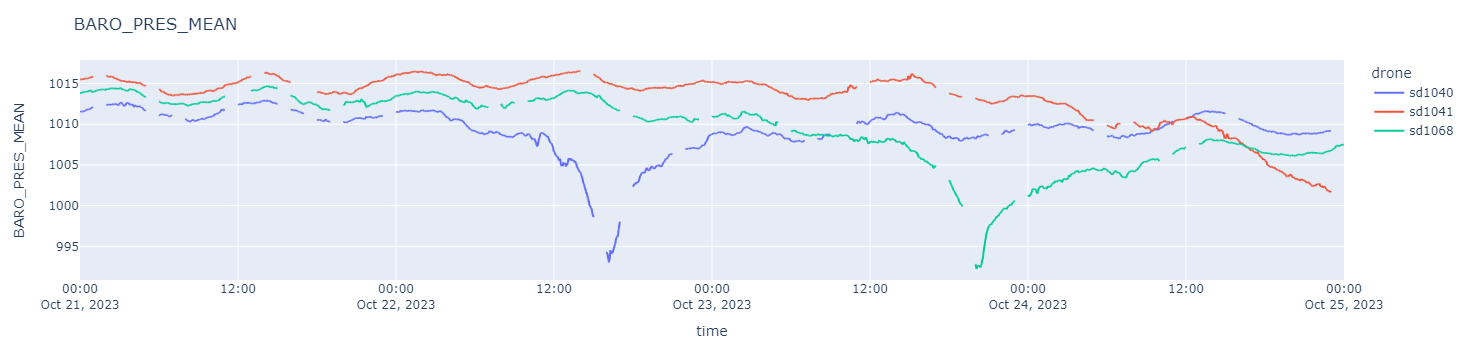

In [25]:
figure = px.line(df, x='time', y=plot_value, color='drone')
figure.update_yaxes(title=dict(text=plot_value))
figure.update_layout(title=plot_value)
figure